In [2]:
pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 20.7 MB/s eta 0:00:00


In [3]:
import pulp

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pulp import *
import pulp as plp

In [6]:
pip install ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 KB 31.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.13.0 requires protobuf<4,>=3.13, but you have protobuf 4.22.1 which is incompatible.


In [7]:
from ortools.linear_solver import pywraplp

Part 1: Rockhill Shipping & Transport Company

In [8]:
import pulp as lp

# List of plants and waste disposal sites
plants = ['Denver', 'Morganton', 'Morrisville', 'Pineville', 'Rockhill', 'Statesville']
waste_sites = ['Orangeburg', 'Florence', 'Macon']

# Shipping costs from each plant to each waste disposal site
shipping_costs = {
    'Denver': {
        'Orangeburg': 12,
        'Florence': 15,
        'Macon': 17
    },
    'Morganton': {
        'Orangeburg': 14,
        'Florence': 9,
        'Macon': 10
    },
    'Morrisville': {
        'Orangeburg': 13,
        'Florence': 20,
        'Macon': 11
    },
    'Pineville': {
        'Orangeburg': 17,
        'Florence': 16,
        'Macon': 19
    },
    'Rockhill': {
        'Orangeburg': 7,
        'Florence': 14,
        'Macon': 12
    },
    'Statesville': {
        'Orangeburg': 22,
        'Florence': 16,
        'Macon': 18
    }
}

# Waste generated by each plant
waste_generated = {
    'Denver': 45,
    'Morganton': 26,
    'Morrisville': 42,
    'Pineville': 53,
    'Rockhill': 29,
    'Statesville': 38
}

# Maximum capacity of waste disposal sites
max_capacity = {
    'Orangeburg': 65,
    'Florence': 80,
    'Macon': 105
}

# Define the problem
problem = lp.LpProblem('Transportation Problem', lp.LpMinimize)

# Create decision variables
shipment_vars = lp.LpVariable.dicts('Shipment', ((plant, waste_site) for plant in plants for waste_site in waste_sites),
                                    lowBound=0, cat='Integer')

# Add constraints
# Constraint 1: Maximum waste capacity at waste disposal sites
for waste_site in waste_sites:
    problem += lp.lpSum(shipment_vars[(plant, waste_site)] for plant in plants) <= max_capacity[waste_site]

# Constraint 2: Total waste shipped from each plant must equal waste generated
for plant in plants:
    problem += lp.lpSum(shipment_vars[(plant, waste_site)] for waste_site in waste_sites) == waste_generated[plant]

# Define the objective function
# Define the objective function
# Case 1: Direct shipment from plants to waste disposal sites
objective_function = lp.lpSum(shipment_vars[(plant, waste_site)] * shipping_costs[plant][waste_site]
                              for plant in plants for waste_site in waste_sites)

# Case 2: Intermediate shipment through other plants or waste disposal sites
for intermediate_point in plants + waste_sites:
    for plant in plants:
        if plant != intermediate_point:
            for waste_site in waste_sites:
                if waste_site != intermediate_point:
                    if plant in shipping_costs and intermediate_point in shipping_costs[plant] \
                            and intermediate_point in shipping_costs and waste_site in shipping_costs[intermediate_point]:
                        # Add the terms for intermediate shipment to the objective function
                        objective_function += shipment_vars[(plant, intermediate_point)] * shipping_costs[plant][intermediate_point] \
                                             + shipment_vars[(intermediate_point, waste_site)] * shipping_costs[intermediate_point][waste_site]

# Set the objective function
problem += objective_function

# Solve the problem
problem.solve()

# Print the results
print("Objective value =", lp.value(problem.objective))
for var in problem.variables():
    print(var.name, "=", var.varValue)

Objective value = 2988.0
Shipment_('Denver',_'Florence') = 0.0
Shipment_('Denver',_'Macon') = 0.0
Shipment_('Denver',_'Orangeburg') = 45.0
Shipment_('Morganton',_'Florence') = 0.0
Shipment_('Morganton',_'Macon') = 26.0
Shipment_('Morganton',_'Orangeburg') = 0.0
Shipment_('Morrisville',_'Florence') = 0.0
Shipment_('Morrisville',_'Macon') = 42.0
Shipment_('Morrisville',_'Orangeburg') = 0.0
Shipment_('Pineville',_'Florence') = 53.0
Shipment_('Pineville',_'Macon') = 0.0
Shipment_('Pineville',_'Orangeburg') = 0.0
Shipment_('Rockhill',_'Florence') = 0.0
Shipment_('Rockhill',_'Macon') = 9.0
Shipment_('Rockhill',_'Orangeburg') = 20.0
Shipment_('Statesville',_'Florence') = 27.0
Shipment_('Statesville',_'Macon') = 11.0
Shipment_('Statesville',_'Orangeburg') = 0.0


/usr/local/lib/python3.9/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Part 2: Investment Allocations

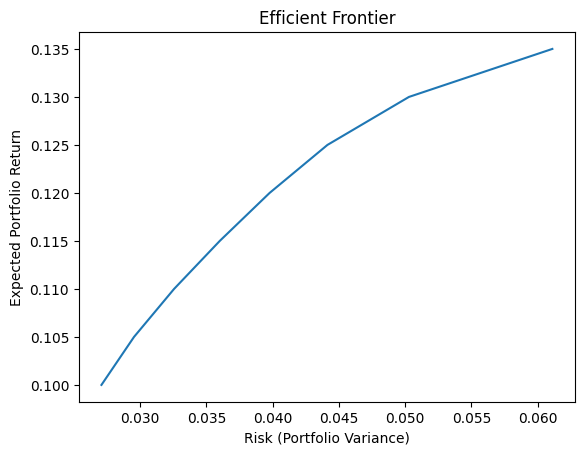

In [9]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the expected returns, covariance matrix, and baseline return values
expected_returns = np.array([0.07, 0.12, 0.11, 0.14, 0.14, 0.09])
covariance_matrix = np.array([[0.001, 0.0003, -0.0003, 0.00035, -0.00035, 0.0004],
                             [0, 0.009, 0.0004, 0.0016, -0.0016, 0.0006],
                             [0, 0, 0.008, 0.0015, -0.0055, -0.0007],
                             [0, 0, 0, 0.012, -0.0005, 0.0008],
                             [0, 0, 0, 0, 0.012, -0.0008],
                             [0, 0, 0, 0, 0, 0.005]])
baseline_returns = np.array([0.10, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135])

# Define the mean-variance portfolio optimization function
def optimize_portfolio(weights, expected_returns, covariance_matrix, target_return):
    portfolio_return = np.sum(weights * expected_returns)
    portfolio_risk = np.sqrt(np.dot(weights, np.dot(covariance_matrix, weights.T)))
    return portfolio_risk

# Perform portfolio optimization for each baseline return value and obtain the corresponding minimum risk
portfolio_risks = []
for baseline_return in baseline_returns:
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, # sum of weights equals 1
                   {'type': 'eq', 'fun': lambda x: np.sum(x * expected_returns) - baseline_return}) # expected return equals baseline return
    initial_weights = np.ones(len(expected_returns)) / len(expected_returns) # initial weights for optimization
    result = minimize(optimize_portfolio, initial_weights, args=(expected_returns, covariance_matrix, baseline_return), constraints=constraints, bounds=[(0,1) for _ in range(len(expected_returns))])
    portfolio_risks.append(result.fun)

# Plot "e" versus "r"
plt.plot(portfolio_risks, baseline_returns)
plt.xlabel('Risk (Portfolio Variance)')
plt.ylabel('Expected Portfolio Return')
plt.title('Efficient Frontier')
plt.show()

(i) Suppose that our investor wishes to invest $10,000 in this portfolio. Determine how he
should allocate this investment to the individual assets in his portfolio in order to have a
minimum baseline expected return of 11%, and at the same time, at a minimum risk. 

In [15]:
# Define the expected returns
expected_returns = np.array([0.07, 0.12, 0.11, 0.14, 0.14, 0.09])

# Define the covariance matrix
covariance_matrix = np.array([[0.001, 0.0003, -0.0003, 0.00035, -0.00035, 0.0004],
                              [0, 0.009, 0.0004, 0.0016, -0.0016, 0.0006],
                              [0, 0, 0.008, 0.0015, -0.0055, -0.0007],
                              [0, 0, 0, 0.012, -0.0005, 0.0008],
                              [0, 0, 0, 0, 0.012, -0.0008],
                              [0, 0, 0, 0, 0, 0.005]])

# Define the constraint function for portfolio weights
constraint = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Define the objective function to minimize
def objective_function(x, expected_returns, covariance_matrix):
    portfolio_return = np.dot(x, expected_returns)
    portfolio_risk = np.sqrt(np.dot(x, np.dot(covariance_matrix, x)))
    return portfolio_risk

# Set the initial guess for portfolio weights
initial_guess = np.ones(len(expected_returns)) / len(expected_returns)

# Define the bounds for portfolio weights
bounds = [(0, None)] * len(expected_returns)

# Define the target expected return
target_return = 0.11

# Optimize the portfolio weights to minimize risk
result = minimize(objective_function, initial_guess, args=(expected_returns, covariance_matrix),
                  constraints=constraint, bounds=bounds, method='SLSQP')

# Get the optimal portfolio weights
optimal_weights = result.x

# Calculate the expected portfolio return
expected_portfolio_return = np.dot(optimal_weights, expected_returns)

# Print the optimal portfolio weights and expected portfolio return
print("Optimal Portfolio Weights: ", optimal_weights)
print("Expected Portfolio Return: ", expected_portfolio_return)

Optimal Portfolio Weights:  [0.59761952 0.05665435 0.11843264 0.02812158 0.09304761 0.10612429]
Expected Portfolio Return:  0.08817435263237917


(ii) Let the solution pair be denoted by (r, e), where “r” denotes the minimized risk and “e”
denotes the expected portfolio return after the problem is solved. Use successive values of
10%, 10.5%, 11%, 11.5%, 12%, 12.5%, 13% and 13.5% as the baseline return values to obtain
eight pairs of solutions (r, e). Plot “e” versus “r”. Explain whether there exists a pattern in
this plot. In other words, explain, in your opinion, the type of mathematical relationship that
“r” and “e” may have. 

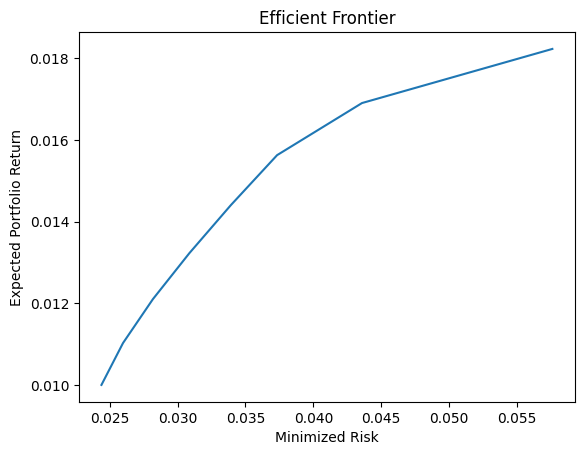

In [14]:
import cvxpy as cp
returns = np.array([0.07, 0.12, 0.11, 0.14, 0.14, 0.09])
covariance = np.array([[0.001, 0.0003, -0.0003, 0.00035, -0.00035, 0.0004],
                       [0.0003, 0.009, 0.0004, 0.0016, -0.0016, 0.0006],
                       [-0.0003, 0.0004, 0.008, -0.0055, -0.0007, 0.0],
                       [0.00035, 0.0016, -0.0055, 0.012, -0.0005, 0.0],
                       [-0.00035, -0.0016, -0.0007, -0.0005, 0.012, 0.0],
                       [0.0004, 0.0006, 0.0, 0.0, 0.0, 0.005]])

n = len(returns)

# Define the variables
x = cp.Variable(n)
target_return = cp.Parameter(nonneg=True)

# Define the objective function
portfolio_variance = cp.quad_form(x, covariance)
objective = cp.Minimize(portfolio_variance)

# Define the constraints
constraints = [cp.sum(x) == 1, x >= 0, returns @ x >= target_return]

# Solve the problem for different target returns
r_list = []
e_list = []
for target in [0.1, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135]:
    target_return.value = target
    problem = cp.Problem(objective, constraints)
    problem.solve()
    r_list.append(np.sqrt(problem.value))
    e_list.append(target_return.value * x.value.T @ returns)

# Plot e versus r
import matplotlib.pyplot as plt
plt.plot(r_list, e_list)
plt.xlabel('Minimized Risk')
plt.ylabel('Expected Portfolio Return')
plt.title('Efficient Frontier')
plt.show()